# A tutorial for Kaggle Titanic competition using Deep Learning with Keras

## Workflow stages 
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question and problem definition
Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Workflow goals
The data science solutions workflow solves for seven major goals.

**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals.



In [1]:
# data analysis  
import numpy as np 
import pandas as pd 

# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# machine learning 
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.framework import ops

# utils
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Acquire data

In [2]:
train_data = pd.read_csv('./Dataset/train.csv')
test_data = pd.read_csv('./Dataset/test.csv')

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Data Overview 

In [5]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

1. Variables 

2. Missing Values 

Missing Values: Age, Cabin, Embarked, Fare (in test_data).

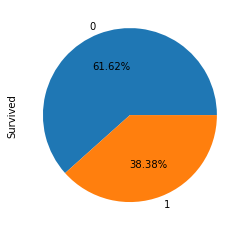

In [6]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%');

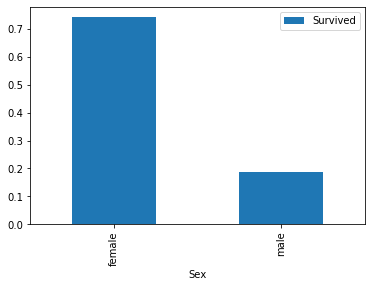

In [7]:
# Sex & Survival rate 
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar();

Observation: More females survived 

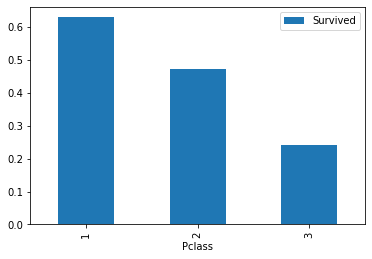

In [8]:
# Class & Survival rate 
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar();

Survival rate: Class 1 > Class 2 > Class 3

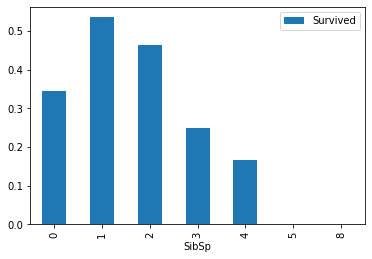

In [9]:
# Family & Survial Rate 
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar();

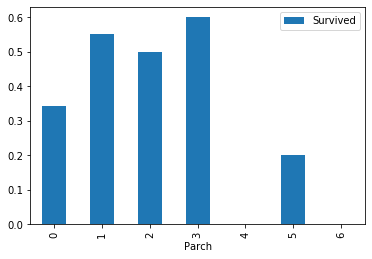

In [10]:
train_data[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar();

Passengers with small family size were more likely to survive. 

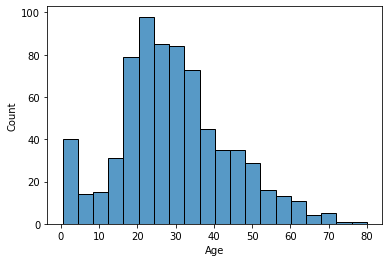

In [11]:
# Age & Surival Rate 
age_data = train_data[train_data['Age'].notna()][['Age', 'Survived']]
sns.histplot(age_data['Age']);

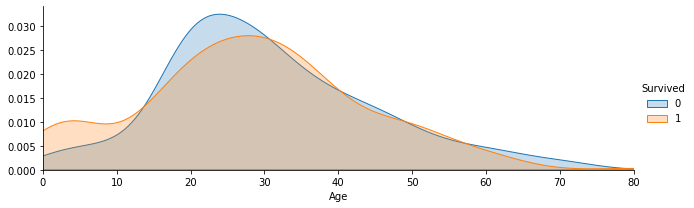

In [12]:
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3);
ageFacet.map(sns.kdeplot,'Age',shade=True);
ageFacet.set(xlim=(0,train_data['Age'].max()));
ageFacet.add_legend();

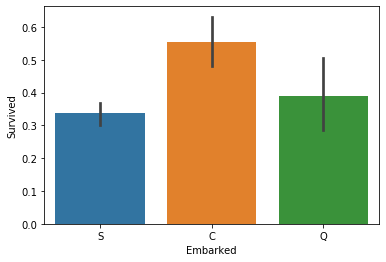

In [13]:
# Embarked & Survival Rate
sns.barplot(data=train_data,x='Embarked',y='Survived');

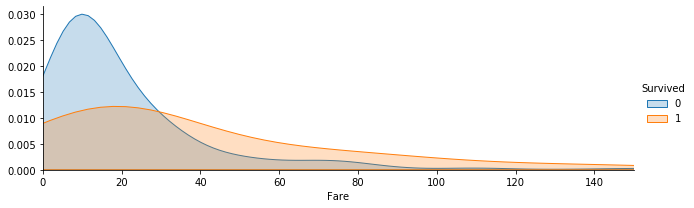

In [14]:
# Fare & Survival Rate
fareFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3);
fareFacet.map(sns.kdeplot,'Fare',shade=True);
fareFacet.set(xlim=(0,150));
fareFacet.add_legend();

Low surival rate for fare < 18.

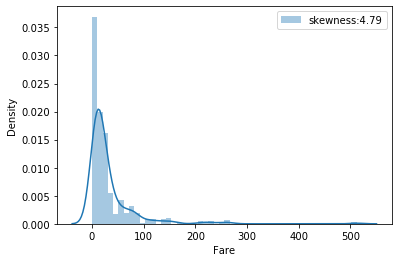

In [15]:
farePlot=sns.distplot(train_data['Fare'][train_data['Fare'].notnull()],label='skewness:%.2f'%(train_data['Fare'].skew()))
farePlot.legend(loc='best')

In [16]:
# log Fare 
#train_data['Fare'] = train_data['Fare'].map(lambda x: np.log(x) if x>0 else 0)
#test_data['Fare'] = train_data['Fare'].map(lambda x: np.log(x) if x>0 else 0)

# Data pre-processing

In [17]:
full_data = pd.concat([train_data, test_data], axis=0)

In [18]:
# Missing value 
# Cabin
full_data['Cabin'] = full_data['Cabin'].fillna('Unknown')

In [19]:
# Embarked
full_data[full_data['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62       1.0       1                        Icard, Miss. Amelie   
829          830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [20]:
full_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
full_data['Embarked'] = full_data['Embarked'].fillna('S')

In [22]:
# Fare 
full_data[full_data['Fare'].isnull()]

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044       NaN       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare    Cabin Embarked  
152      0   3701   NaN  Unknown        S

In [23]:
full_data['Fare']=full_data['Fare'].fillna(full_data[(full_data['Pclass']==3)&(full_data['Embarked']=='S')&(full_data['Cabin']=='Unknown')]['Fare'].mean())

In [24]:
# Feature Engineering 

full_data['Title'] = full_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
full_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Capt          1
Countess      1
Lady          1
Jonkheer      1
Dona          1
Mme           1
Sir           1
Don           1
Name: Title, dtype: int64

In [25]:
 Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }

full_data['Title']=full_data['Title'].map(Title_Dictionary)
full_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

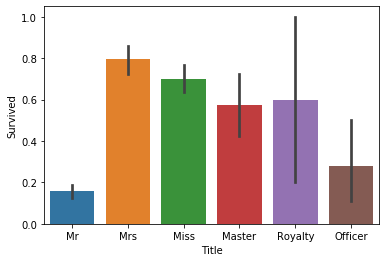

In [26]:
sns.barplot(data=full_data, x='Title', y='Survived');

Mr and Officer low survival rate

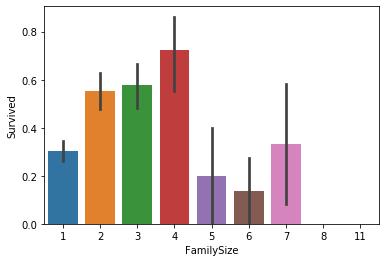

In [27]:
# Family Size 
full_data['FamilySize'] = full_data['Parch'] + full_data['SibSp'] + 1 
sns.barplot(data=full_data, x='FamilySize', y='Survived');

Family Size between 2 and 4 higher survival rate 

In [28]:
full_data['Singleton'] = full_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
full_data['SmallFamily'] = full_data['FamilySize'].map(lambda s: 1 if 2<= s <= 4 else 0)
full_data['LargeFamily'] = full_data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

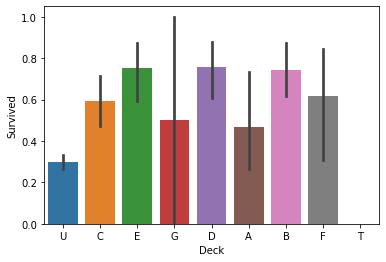

In [29]:
# Cabin 
full_data['Deck']=full_data['Cabin'].map(lambda x:x[0])
sns.barplot(data=full_data, x='Deck', y='Survived');

Higher Survival Rate for Deck B D E

In [30]:
full_data[full_data['Age'].isnull()].head()

PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6       0.0       3               Moran, Mr. James    male  NaN   
17           18       1.0       2   Williams, Mr. Charles Eugene    male  NaN   
19           20       1.0       3        Masselmani, Mrs. Fatima  female  NaN   
26           27       0.0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29       1.0       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare    Cabin Embarked Title  FamilySize  \
5       0      0  330877   8.4583  Unknown        Q    Mr           1   
17      0      0  244373  13.0000  Unknown        S    Mr           1   
19      0      0    2649   7.2250  Unknown        C   Mrs           1   
26      0      0    2631   7.2250  Unknown        C    Mr           1   
28      0      0  330959   7.8792  Unknown        Q  Miss           1   

    Singleton  SmallFamily  LargeFamily Deck  
5           1            0            0    U  
17          1            0            0    U  
19          1            0            0    U  
26          1            0            0    U  
28          1            0            0    U

In [31]:
AgePre = full_data[['Age','Pclass','Title','FamilySize','Sex']]
AgePre = pd.get_dummies(AgePre)
AgePre.head()

Age  Pclass  FamilySize  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0  22.0       3           2             0           0         1          0   
1  38.0       1           2             0           0         0          1   
2  26.0       3           1             0           1         0          0   
3  35.0       1           2             0           0         0          1   
4  35.0       3           1             0           0         1          0   

   Title_Officer  Title_Royalty  Sex_female  Sex_male  
0              0              0           0         1  
1              0              0           1         0  
2              0              0           1         0  
3              0              0           1         0  
4              0              0           0         1

In [32]:
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']
#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [33]:
#模型得分
rfr.score(AgeKnown_X,AgeKnown_y)

0.4910148724160788

In [34]:
#预测年龄
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#填充预测数据
full_data.loc[full_data['Age'].isnull(),['Age']]=AgeUnKnown_y
full_data.info()  #此时已无缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  Singleton    1309 non-null   int64  
 15  SmallFamily  1309 non-null   int64  
 16  LargeFamily  1309 non-null   int64  
 17  Deck         1309 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 

In [35]:
full_data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title  FamilySize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr           2   
1      0          PC 17599  71.2833      C85        C   Mrs           2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss           1   
3      0            113803  53.1000     C123        S   Mrs           2   
4      0            373450   8.0500  Unknown        S    Mr           1   

   Singleton  SmallFamily  LargeFamily Deck  
0          0            1            0    U  
1          0            1            0    C  
2          1            0            0    U  
3          0            1            0    C  
4          1            0            0    U

In [36]:
#人工筛选
fullSel=full_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Singleton     -0.203367
LargeFamily   -0.125147
Age           -0.065640
SibSp         -0.035322
FamilySize     0.016639
Parch          0.081629
Fare           0.257307
SmallFamily    0.279855
Survived       1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

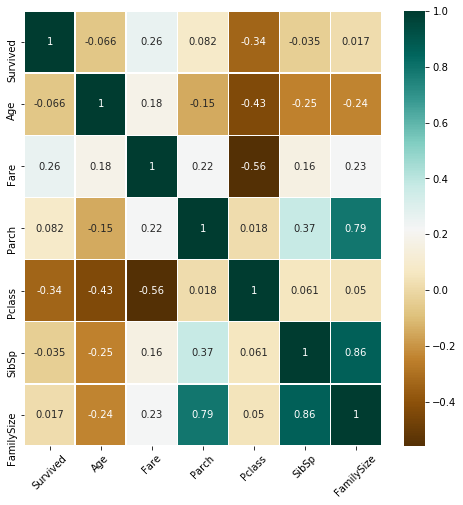

In [37]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','FamilySize','Deck']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [46]:
fullSel['LittleBuddy'] = fullSel['Age'].map(lambda s: 1 if s<=10 else 0)
fullSel['LittleBuddy'].value_counts()

0    1211
1      98
Name: LittleBuddy, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: HighFare, dtype: int64

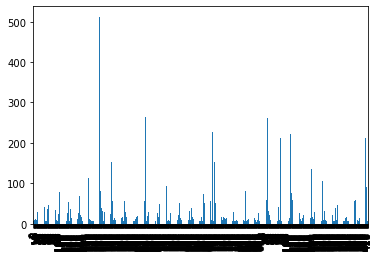

In [44]:
fullSel['HighFare'] = fullSel['Fare'].map(lambda s: 1 if s>=140 else 0)
fullSel['HighFare'].value_counts()

In [47]:
fullSel=fullSel.drop(['SibSp','Parch','FamilySize'],axis=1)

In [48]:
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full_data['Pclass'],prefix='Pclass')

In [49]:
PclassDf.head()

Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1

In [50]:
fullSel = pd.concat([fullSel, PclassDf], axis=1)

In [51]:
fullSel.drop('Pclass', axis=1, inplace=True)

In [52]:
fullSel.head()

Survived   Age     Fare  Singleton  SmallFamily  LargeFamily  HighFare  \
0       0.0  22.0   7.2500          0            1            0         0   
1       1.0  38.0  71.2833          0            1            0         0   
2       1.0  26.0   7.9250          1            0            0         0   
3       1.0  35.0  53.1000          0            1            0         0   
4       0.0  35.0   8.0500          1            0            0         0   

   LittleBuddy  Sex_female  Sex_male  ...  Deck_C  Deck_D  Deck_E  Deck_F  \
0            0           0         1  ...       0       0       0       0   
1            0           1         0  ...       1       0       0       0   
2            0           1         0  ...       0       0       0       0   
3            0           1         0  ...       1       0       0       0   
4            0           0         1  ...       0       0       0       0   

   Deck_G  Deck_T  Deck_U  Pclass_1  Pclass_2  Pclass_3  
0       0       0       1         0         0         1  
1       0       0       0         1         0         0  
2       0       0       1         0         0         1  
3       0       0       0         1         0         0  
4       0       0       1         0         0         1  

[5 rows x 31 columns]

In [53]:
fullSel[fullSel.columns] = fullSel[fullSel.columns].apply(lambda x: x/x.max(), axis=0)

In [54]:
fullSel.head()

Survived     Age      Fare  Singleton  SmallFamily  LargeFamily  HighFare  \
0       0.0  0.2750  0.014151        0.0          1.0          0.0       0.0   
1       1.0  0.4750  0.139136        0.0          1.0          0.0       0.0   
2       1.0  0.3250  0.015469        1.0          0.0          0.0       0.0   
3       1.0  0.4375  0.103644        0.0          1.0          0.0       0.0   
4       0.0  0.4375  0.015713        1.0          0.0          0.0       0.0   

   LittleBuddy  Sex_female  Sex_male  ...  Deck_C  Deck_D  Deck_E  Deck_F  \
0          0.0         0.0       1.0  ...     0.0     0.0     0.0     0.0   
1          0.0         1.0       0.0  ...     1.0     0.0     0.0     0.0   
2          0.0         1.0       0.0  ...     0.0     0.0     0.0     0.0   
3          0.0         1.0       0.0  ...     1.0     0.0     0.0     0.0   
4          0.0         0.0       1.0  ...     0.0     0.0     0.0     0.0   

   Deck_G  Deck_T  Deck_U  Pclass_1  Pclass_2  Pclass_3  
0     0.0     0.0     1.0       0.0       0.0       1.0  
1     0.0     0.0     0.0       1.0       0.0       0.0  
2     0.0     0.0     1.0       0.0       0.0       1.0  
3     0.0     0.0     0.0       1.0       0.0       0.0  
4     0.0     0.0     1.0       0.0       0.0       1.0  

[5 rows x 31 columns]

In [103]:
train = fullSel[fullSel['Survived'].notnull()]
test = fullSel[fullSel['Survived'].isnull()]
targets = train['Survived']
train.drop('Survived', axis=1, inplace=True)
test.drop('Survived', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = train_test_split(train,targets,test_size = 0.2,random_state = 42)

In [110]:
x = X_train
y = Y_train
epoch = 50
L1=100
L2=80
L3=5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x,y,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_val, y=Y_val)
print(L1,L2,L3)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

6/6 [==============================] - 0s 820us/step - loss: 0.5284 - accuracy: 0.8156
100 80 5
Loss = 0.5283509492874146
Test Accuracy = 0.8156424760818481
Training Accuracy = 0.834269642829895


In [111]:
model.save('dnn.h5', save_format='h5')

In [112]:
history = model.fit(train,targets,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_val, y=Y_val)
print(L1,L2,L3)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

6/6 [==============================] - 0s 669us/step - loss: 0.4825 - accuracy: 0.8324
100 80 5
Loss = 0.4824608862400055
Test Accuracy = 0.832402229309082
Training Accuracy = 0.8383838534355164


In [113]:
l = model.predict(test)

In [114]:
survived = [1 if x > 0.5 else 0 for x in l]
#original_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
original_test_data = pd.read_csv('./Dataset/test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived':  survived
})

submission.to_csv('titanic-nn.csv', index=False)